# Assignment 2 Salary Predictions – Submissions

This notebook compares the submissions of our classmates.

Make sure you download the following files
- The class submissions from [Google Drive](https://drive.google.com/drive/folders/0Bw6wuIHVDW1dfnhaN3NPemVPMEdMUzllVGtVWEVRWVZtNXJWRWxvVDU2LWZzZXF6ay02ZDQ)
- The real salaries [test-solution.csv](http://gadatascience.com/datasets/adzuna_salary_prediction/test-solution.csv)

The solutions to this exercise can be found in another notebook.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
path_to_submissions = "/Users/ruben/Downloads/HW2 Linear Regression/"
solution_file = "/Users/ruben/Downloads/test-solution.csv"
REAL = '* Real *'

In [3]:
submissions = pd.read_csv(solution_file, index_col=0, usecols=["Id", "SalaryNormalized"])
submissions.columns = [REAL]

for filename in os.listdir(path_to_submissions):
    if filename.endswith('.csv'):
        df = pd.read_csv(path_to_submissions + filename, index_col=0)
        if len(df.columns) == 1:  # if there's just one column in total..
            submissions[filename.split("_")[0].title()] = df.ix[:,0]  # ..then pick that one
        else:  # ..else pick the "Salary" column
            submissions[filename.split("_")[0].title()] = df.Salary
submissions /= 1000  # denote in $K
submissions.head()

,* Real *,Abdullah,Alexander-100K,Alexander,Chuck,Dave,Max+Chuck,Mike,Robin,Ruben,Santosh
Id,,,,,,,,,,,
72629919,21.6,33.898249,27.268540,25.641052,34.230303,25.0,28.362788,24.991773,34.547581,34.320,32.519384
72629930,47.5,33.684981,40.824458,40.728888,35.890490,18.5,32.975155,34.320530,39.323559,33.151,41.771923
72629937,60.0,46.974530,47.821986,48.420357,44.725075,45.0,32.975155,39.462978,39.323559,46.050,41.771923
72629938,21.5,28.484465,35.744698,33.507292,37.689572,26.5,33.847915,30.714360,35.224100,19.692,31.245347
72629944,30.0,32.600104,36.416549,31.234218,30.936115,12.5,39.882653,35.896875,37.041321,33.074,32.322708


### Average Salary

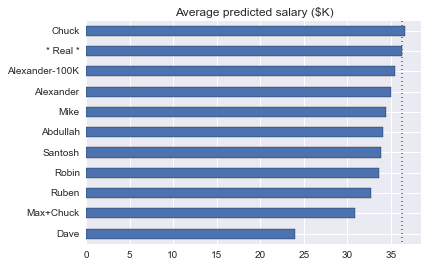

In [4]:
means = submissions.mean().sort(inplace=False)
f = means.plot(kind='barh')
f = plt.plot([means[REAL], means[REAL]], [-1, len(submissions.columns)], ':')
f = plt.title('Average predicted salary ($K)'), plt.xlim(0, means.max() * 1.05)

We could compute a sort of "Absolute Mean Error" (not to be confused with the MAE)

In [5]:
s = submissions.mean()
d = np.abs(s - s[REAL])
s[d.argsort()]

* Real *          36.253650
Chuck             36.644485
Alexander-100K    35.490148
Alexander         34.989405
Mike              34.421793
Abdullah          34.155517
Santosh           33.850192
Robin             33.658961
Ruben             32.709978
Max+Chuck         30.897561
Dave              24.039045
dtype: float64

### MAE

In [6]:
stats = pd.DataFrame(dict(
    Avg=submissions.mean(),
    Std=submissions.std(),        
    MAE=submissions.subtract(submissions[REAL], axis=0).abs().mean(),
    RMSE=np.sqrt(np.square(submissions.subtract(submissions[REAL], axis=0)).mean())))
stats = stats.sort("MAE")  # Sort submissions by MAE: that defines our winner!
submissions = submissions[stats.index]  # Sort columns by MAE - winner on top

In [7]:
print "LEADERBOARD"
for no, name in enumerate(submissions):
    s = stats.loc[name]
    print "%2d) %-20s Avg. $%4.1f K   Std $%4.1f K   MAE $%4.1f K   RMSE $%4.1f K" % \
        (no, name, s.Avg, s.Std, s.MAE, s.RMSE)

LEADERBOARD
 0) * Real *             Avg. $36.3 K   Std $18.2 K   MAE $ 0.0 K   RMSE $ 0.0 K
 1) Alexander-100K       Avg. $35.5 K   Std $10.9 K   MAE $10.5 K   RMSE $14.8 K
 2) Mike                 Avg. $34.4 K   Std $11.0 K   MAE $10.7 K   RMSE $15.1 K
 3) Alexander            Avg. $35.0 K   Std $10.6 K   MAE $10.9 K   RMSE $15.2 K
 4) Ruben                Avg. $32.7 K   Std $12.9 K   MAE $11.0 K   RMSE $16.3 K
 5) Santosh              Avg. $33.9 K   Std $ 7.9 K   MAE $12.1 K   RMSE $16.7 K
 6) Chuck                Avg. $36.6 K   Std $ 7.9 K   MAE $12.2 K   RMSE $16.2 K
 7) Robin                Avg. $33.7 K   Std $ 6.9 K   MAE $12.8 K   RMSE $17.4 K
 8) Max+Chuck            Avg. $30.9 K   Std $ 7.1 K   MAE $13.5 K   RMSE $18.7 K
 9) Abdullah             Avg. $34.2 K   Std $12.2 K   MAE $13.8 K   RMSE $18.4 K
10) Dave                 Avg. $24.0 K   Std $11.7 K   MAE $16.5 K   RMSE $23.2 K


### Distributions

In [8]:
width = 12
height = 3

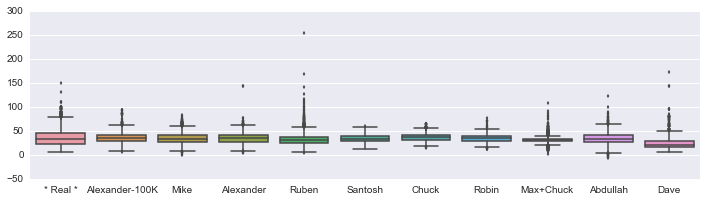

In [9]:
f = plt.figure(figsize=(width, height))
f = seaborn.boxplot(submissions)

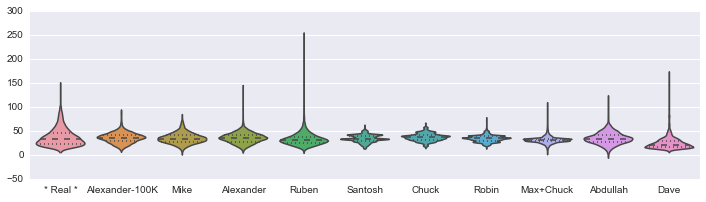

In [10]:
f = plt.figure(figsize=(width, height))
f = seaborn.violinplot(submissions)

### Distributions - histograms

In [11]:
width = 18
height = 4

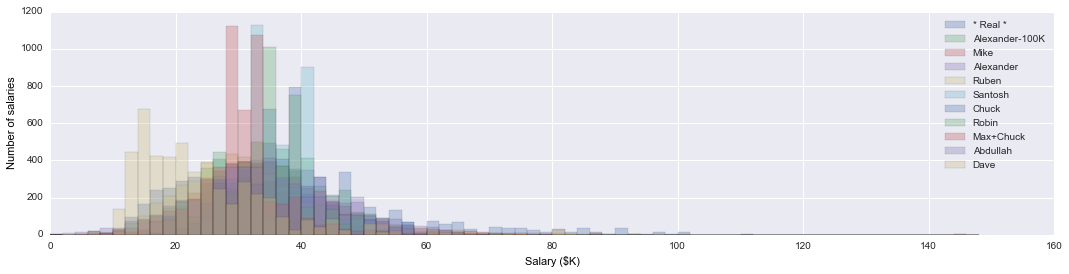

In [12]:
bin_size = 2  # bins of $2K
max_salary = 150  # submissions.max().max()
bins = np.arange(max_salary / bin_size) * bin_size
plt.figure(figsize=(width, height))
for name in submissions:
    submissions[name].hist(bins=bins, label=name, alpha=.3)
    plt.legend(), plt.xlabel("Salary ($K)"), plt.ylabel("Number of salaries")
#     plt.title(name), plt.show()

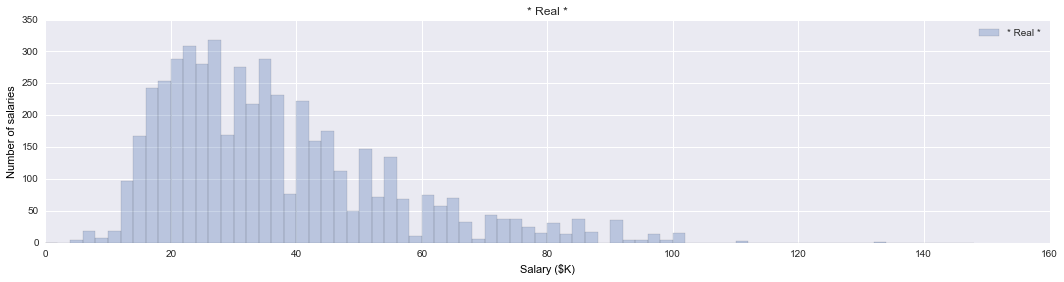

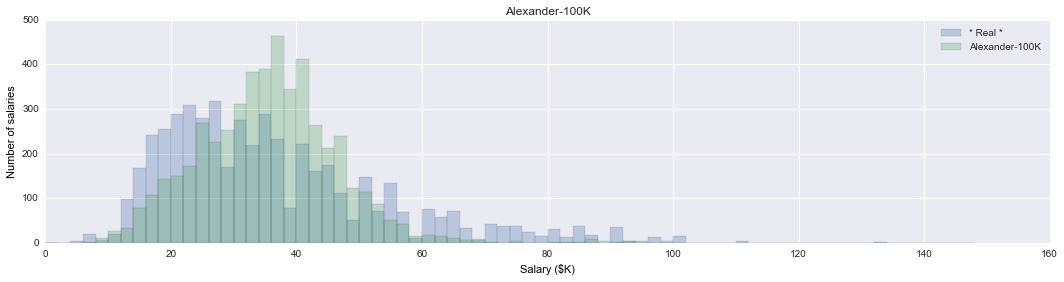

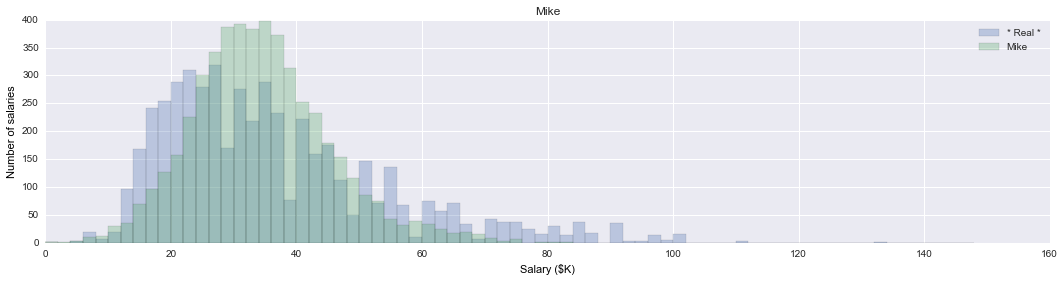

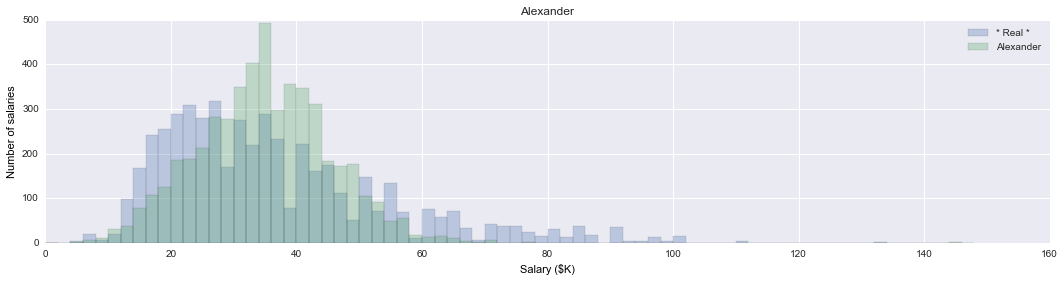

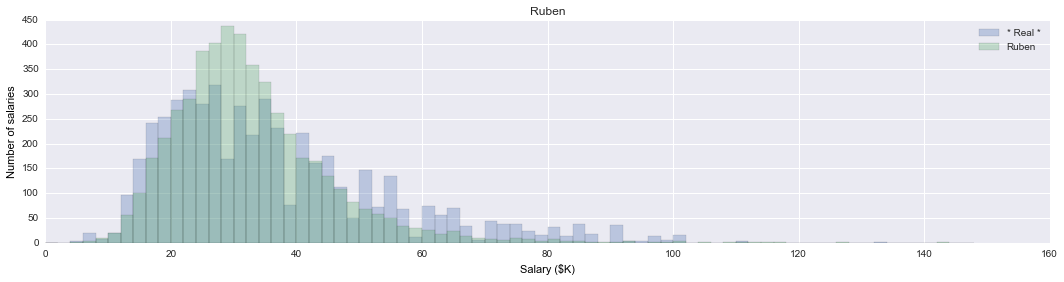

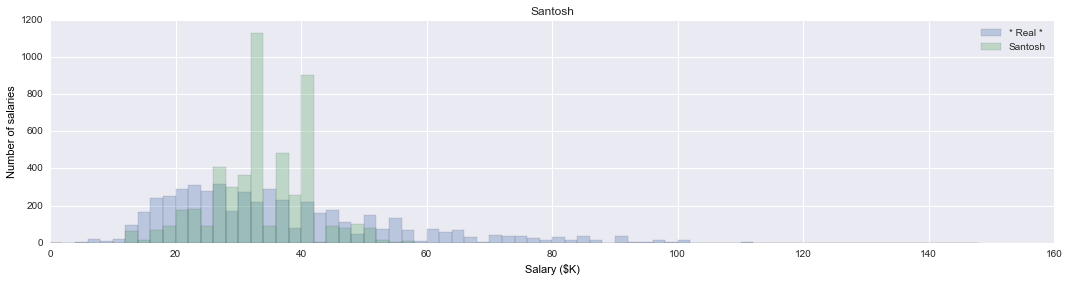

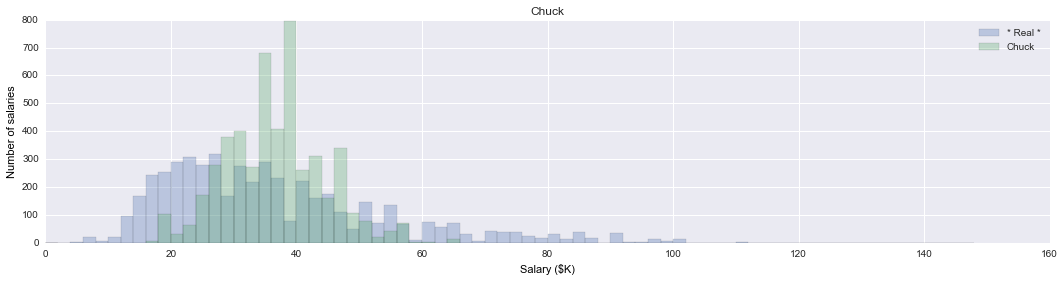

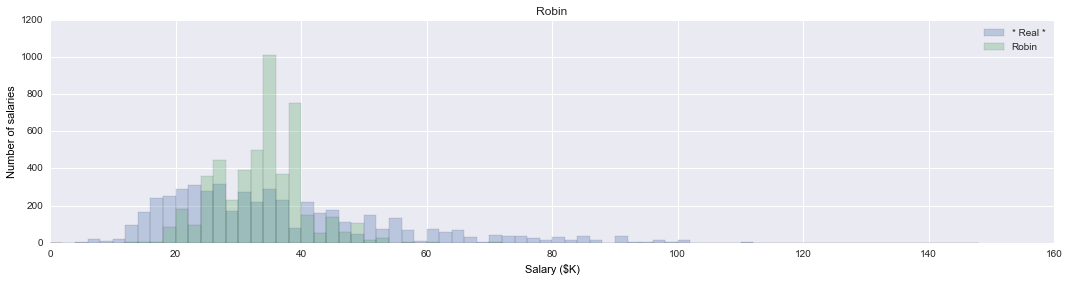

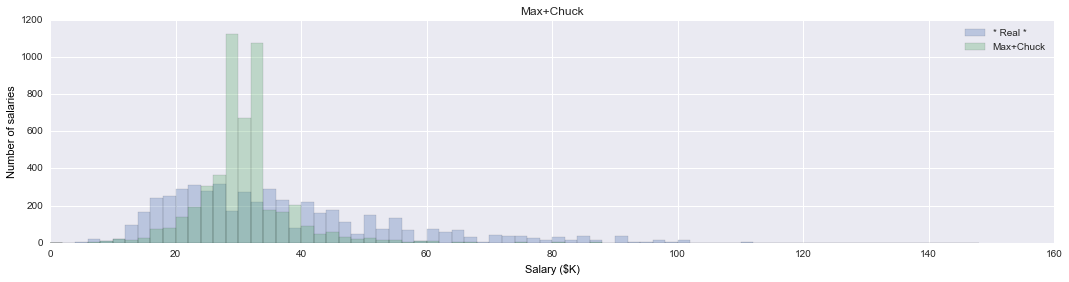

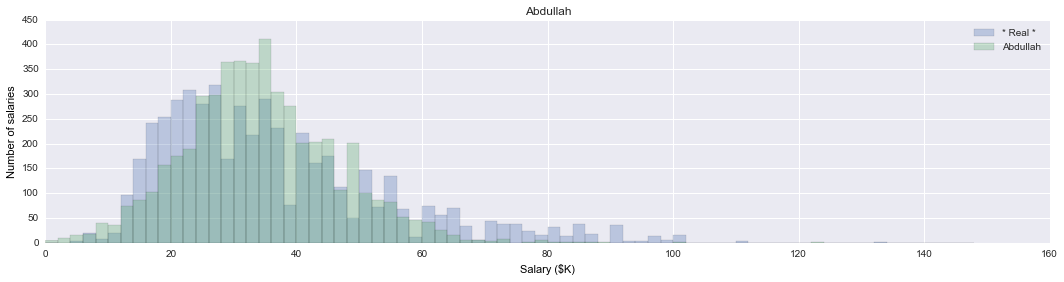

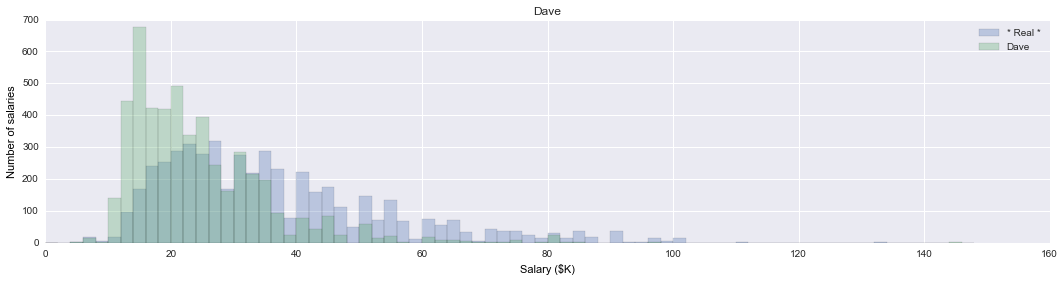

In [13]:
for name in submissions:
    if name != REAL:
        submissions[REAL].hist(bins=bins, label=REAL, alpha=.3, figsize=(width, height))
    submissions[name].hist(bins=bins, label=name, alpha=.3, figsize=(width, height))
#     plt.ylim(0, 450)
    plt.title(name), plt.legend(), plt.xlabel("Salary ($K)"), plt.ylabel("Number of salaries"), plt.show()

###Per Salary Percentile 

This shows the absolute error on each salary level.

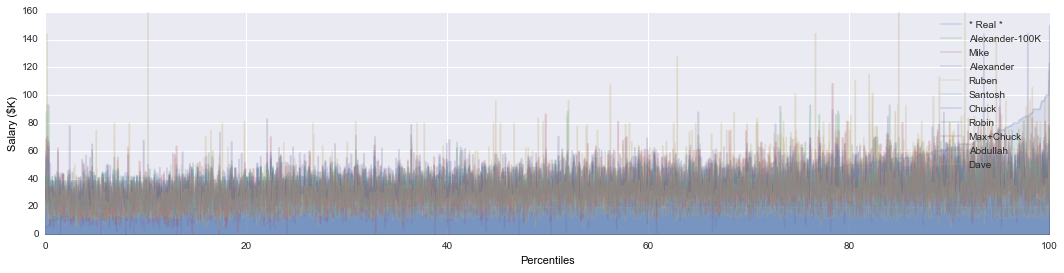

In [14]:
plt.figure(figsize=(width, height))
percentiles = np.linspace(0, 100, len(submissions))
for name in submissions:
    plt.plot(percentiles, submissions.sort(REAL)[name].values, alpha=.2, label=name)
    plt.fill_between(percentiles, submissions.sort(REAL)[name].values, 0, alpha=.1)
f = plt.legend(), plt.xlabel("Percentiles"), plt.ylabel("Salary ($K)"), plt.ylim(0, 160)

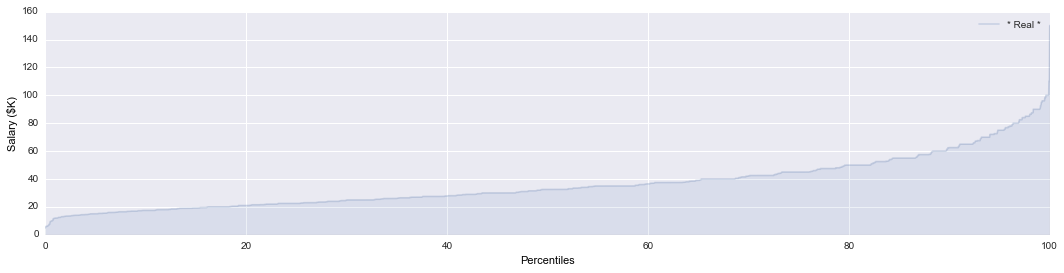

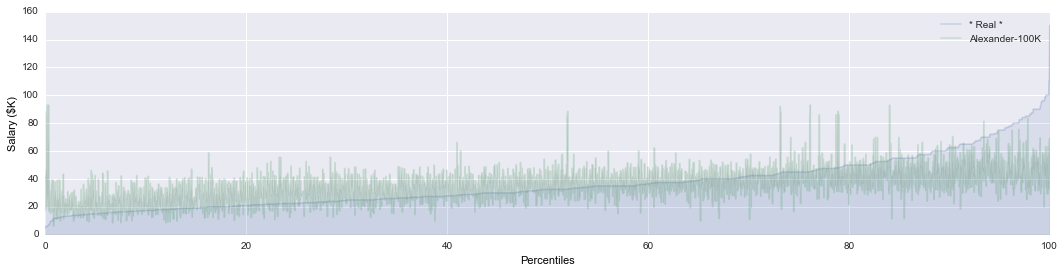

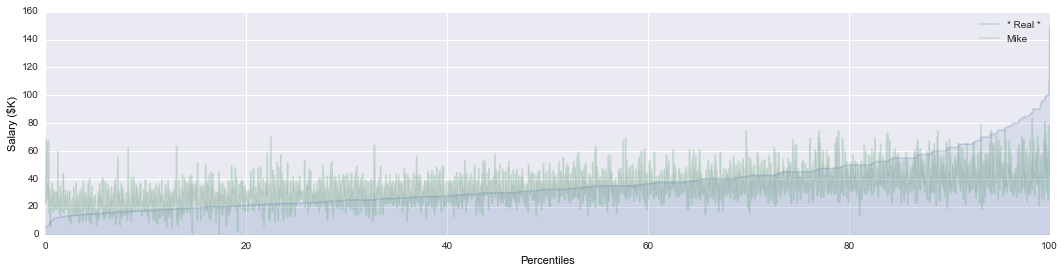

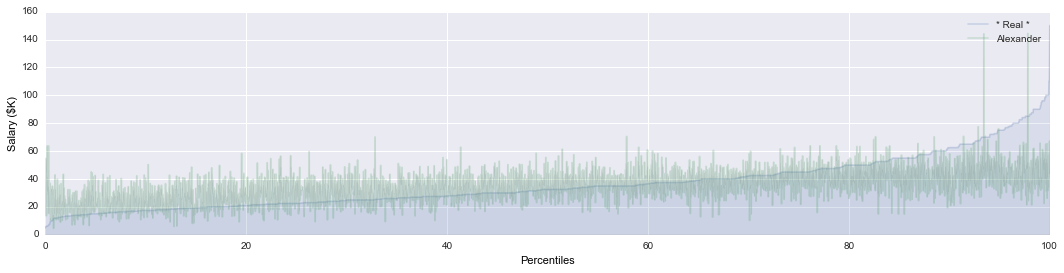

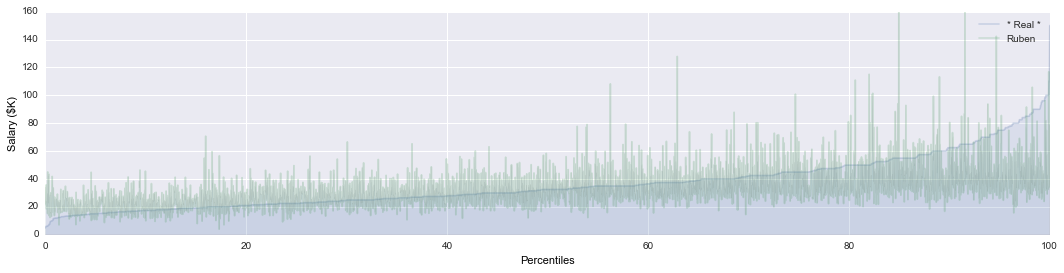

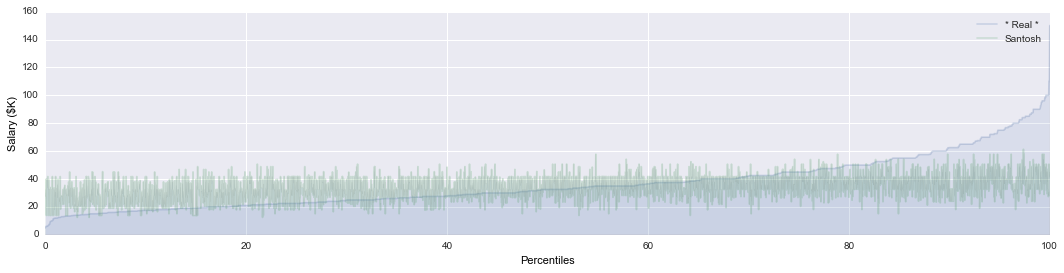

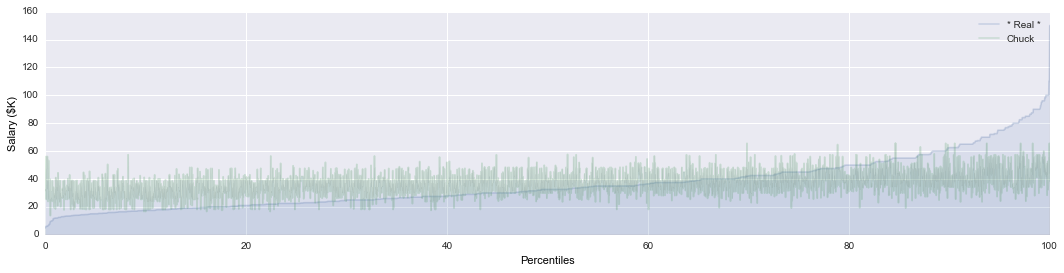

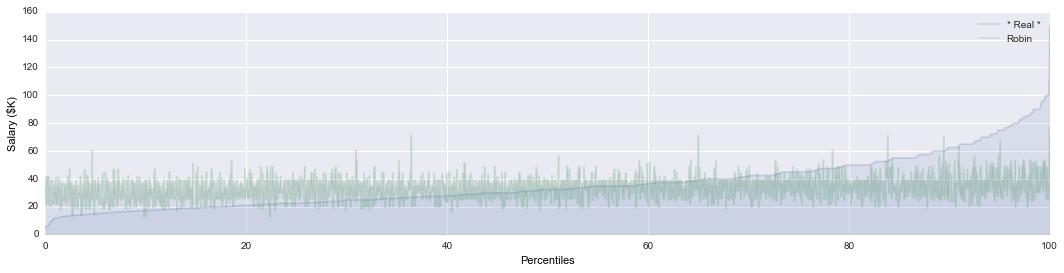

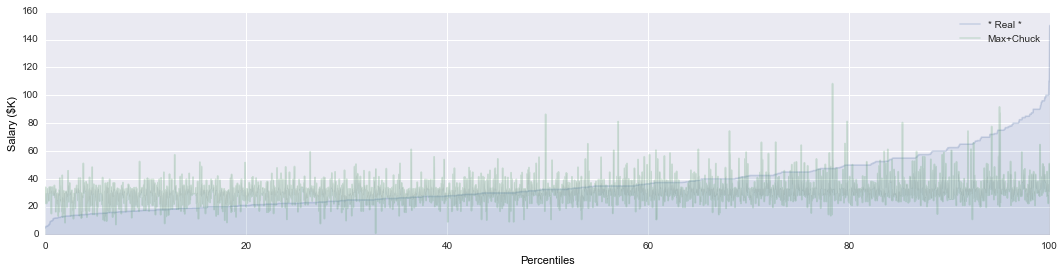

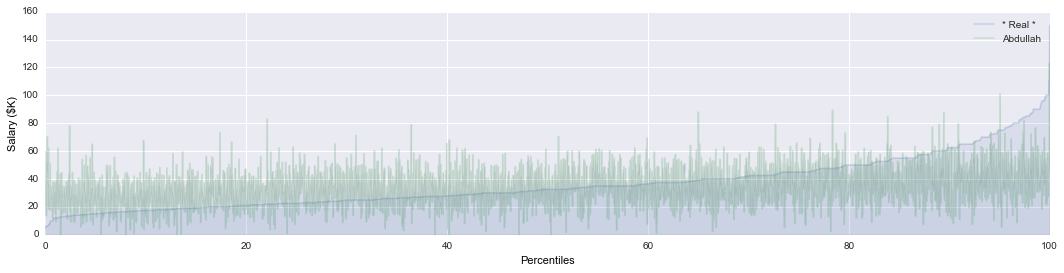

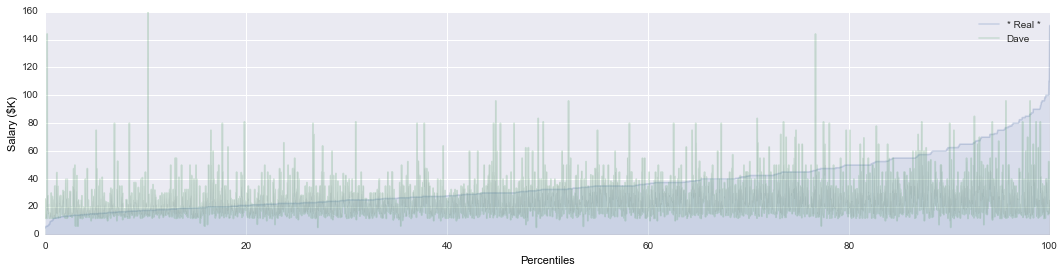

In [15]:
for name in submissions:
    plt.figure(figsize=(width, height))
    if name != REAL:
        plt.plot(percentiles, submissions.sort(REAL)[REAL].values, alpha=.2, label=REAL)
        plt.fill_between(percentiles, submissions.sort(REAL)[REAL].values, 0, alpha=.1)
    plt.plot(percentiles, submissions.sort(REAL)[name].values, alpha=.2, label=name)
    plt.fill_between(percentiles, submissions.sort(REAL)[name].values, 0, alpha=.1)
    f = plt.legend(), plt.xlabel("Percentiles"), plt.ylabel("Salary ($K)"), plt.ylim(0, 160), plt.show()